Выгружаем данные при помощи Pandas из csv файла в количестве 10000 строк.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("data/age.csv", nrows=10000)


Смотрим количество и название столбцов таблицы

In [40]:
print(df.describe().transpose())

<class 'pandas.core.frame.DataFrame'>
Index: 12359 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Id                 12359 non-null  object 
 1   Name               12359 non-null  object 
 2   Short description  12354 non-null  object 
 3   Gender             12273 non-null  object 
 4   Country            12080 non-null  object 
 5   Occupation         12188 non-null  object 
 6   Birth year         12359 non-null  int64  
 7   Death year         12358 non-null  float64
 8   Manner of death    2486 non-null   object 
 9   Age of death       12358 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 1.0+ MB
                count         mean         std     min     25%     50%  \
Birth year    12359.0  1773.275993  298.845499 -2284.0  1787.0  1870.0   
Death year    12358.0  1840.944813  303.842150 -2200.0  1853.0  1938.0   
Age of death  12358.0    67.686519   

Узнаем количество людей относящихся к той или иной стране

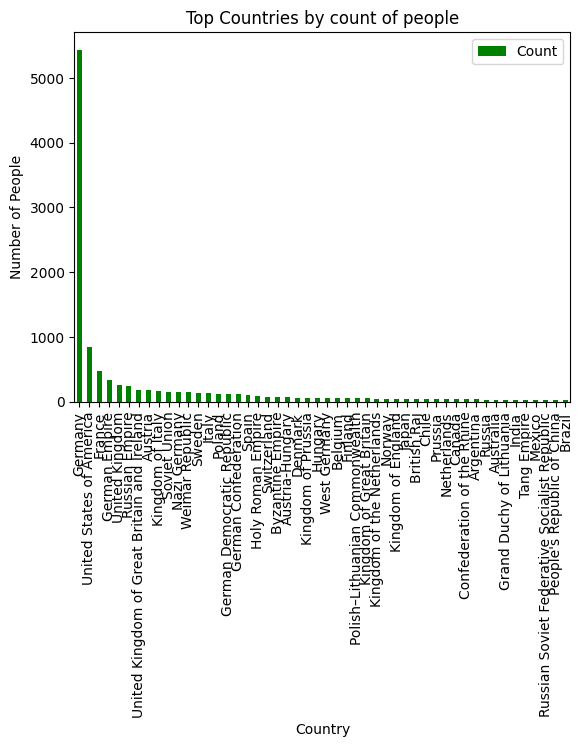

In [41]:
df['Country'] = df['Country'].str.split('; ')
df1 = df.explode('Country')
countrys = df1.groupby("Country").size().reset_index(name="Count") # type: ignore
country_counts_sorted = countrys.sort_values(by='Count', ascending=False)
top_countries = country_counts_sorted.head(50)

top_countries.plot.bar(x='Country', y='Count', color=['green'])
plt.title('Top Countries by count of people')
plt.xlabel('Country')
plt.ylabel('Number of People')
plt.show()

Длительность жизни по полу

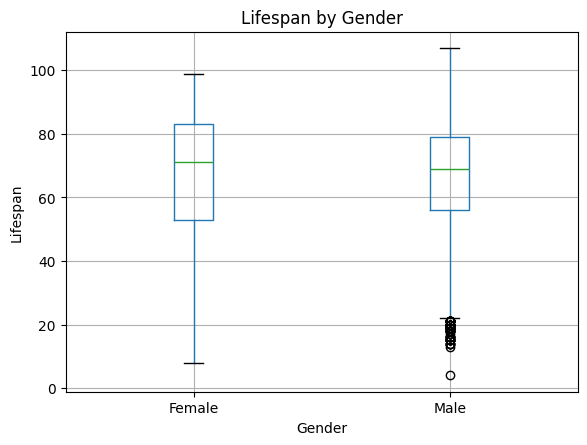

In [11]:
dfgender = df[df['Gender'].isin(['Male', 'Female'])]
dfgender.boxplot(column='Age of death', by='Gender')
plt.title('Lifespan by Gender')
plt.suptitle('')  # Убираем автоматический заголовок
plt.xlabel('Gender')
plt.ylabel('Lifespan')
plt.show()

Количество людей родившихся в тот или иной год

<Axes: ylabel='Frequency'>

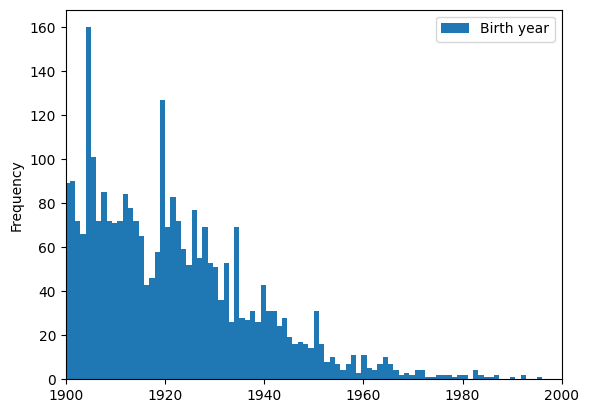

In [10]:
from matplotlib.pyplot import xlim


df.plot.hist(column=["Birth year"], xlim=(1900, 2000), bins=4000)